# Images from July 25th

In [2]:
%matplotlib ipympl
import numpy as np
import sys
sys.path.append('..')
sys.path.insert(1, 'H:/MyDocs/Code/ismrmrd-python/')
sys.path.insert(1, 'H:/MyDocs/Code/ismrmrd-python-tools')
import ismrmrd
import ismrmrdtools


In [5]:
gadg_dir = r''


import sigpy.plot as sl
import glob


files_gadg = glob.glob(gadg_dir+'out_*.h5')


In [6]:
from ismrmrdtools import imageviewer
print(files_gadg)
import os
fname = files_gadg[0]
print(os.path.split(fname))


['out_gs_RARE_IRSE.h5', 'out_gs_RARE_TSE.h5']
('', 'out_gs_RARE_IRSE.h5')


2024-07-25 10:44:15
<KeysViewHDF5 ['image_1']>
(11, 1, 1, 256, 256)


c:\Users\managtegaal\AppData\Local\anaconda3\envs\jupy_gs\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\managtegaal\AppData\Local\anaconda3\envs\jupy_gs\lib\site-packages\ipywidgets\widgets\widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


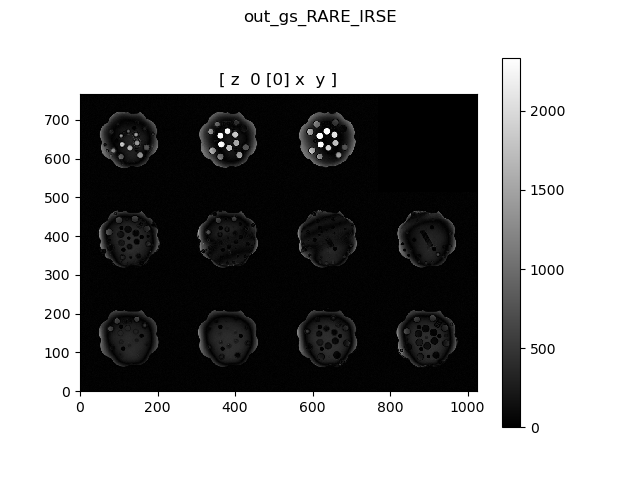

2024-07-25 10:44:27
<KeysViewHDF5 ['image_1']>
(5, 1, 1, 256, 256)


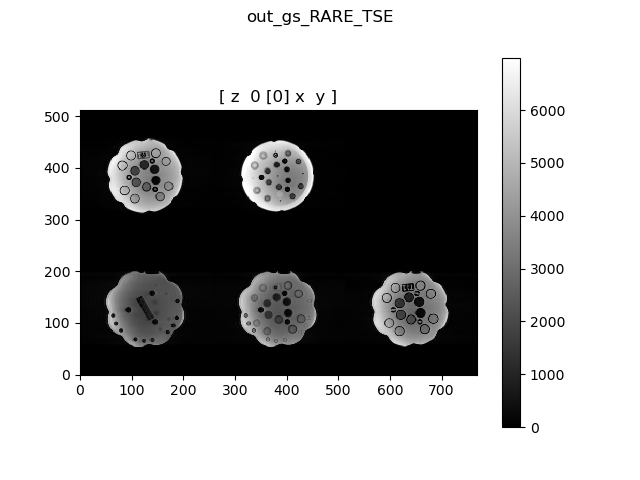

In [17]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
figs = {}
plt.close('all')
df = []
ims = {}
for fname in files_gadg:
    ffname = os.path.split(fname)[1][:-3]
    with h5py.File(fname) as f:
        last_im = list(f.keys())[-1]

        print(last_im)
        print(f[last_im].keys())
        
        im = f[last_im]['image_1']['data'][:]
        try:
            im = im['real']+im['imag']*1j
        except:
            im=im.astype(float)
        
        print(im.shape)
        sh = list(im.shape)
        ims[ffname] = im
    vmax = np.percentile(im, 99.9)
    fig = figs[ffname+'_0'] = sl.ImagePlot(im, colormap='gray', title=ffname, x=-2, y=-1, z=0, vmax=vmax) 
    fig.fig.set_size_inches((10,7))
    fig.update_axes()
    fig.update_image()
    fig.fig.savefig(ffname+'.png', dpi=300)
    fig.z = None
    vmax = np.percentile(im, 99.99)
    fig.vmax=vmax
    if 'IRSE' in ffname:
        fig.slices[0] = 10
    else:
        fig.slices[0] = 3
    fig.update_axes()
    fig.update_image()
    fig.fig.savefig(ffname+'slice'+'.png', dpi=300)
    